In [2]:
#Code For Google Stock Analysis


In [3]:
pip install yfinance

     |████████████████████████████████| 63 kB 1.9 MB/s 
     |████████████████████████████████| 6.4 MB 16.5 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [4]:

import pandas as pd
import math
import pandas_datareader as web
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")
from pandas_datareader import data as web
from datetime import datetime
import yfinance as yf
import streamlit as st



In [5]:
df = yf.download('goog', start = '2012-01-01', end='2020-01-01')
st.header("Google Stock Analysis")
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,325.250885,332.827484,324.966949,331.462585,331.462585,7380561
2012-01-04,331.273315,333.873566,329.076538,332.892242,332.892242,5749470
2012-01-05,329.828735,330.745270,326.889740,328.274536,328.274536,6590410
2012-01-06,328.344299,328.767700,323.681763,323.796326,323.796326,5405987
2012-01-09,322.042908,322.291962,309.455078,310.067780,310.067780,11688849


<function matplotlib.pyplot.show>

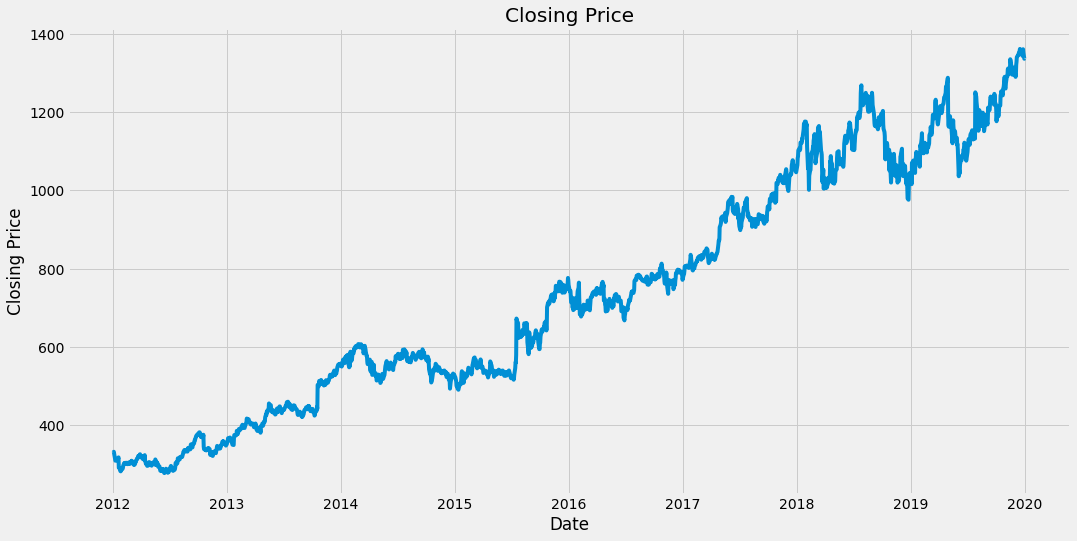

In [6]:
plt.figure(figsize=(16,8))
plt.title('Closing Price')
plt.plot(df['Close'])
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.show
st.altair_chart(plt.show)


In [7]:
 data  = df.filter(['Close'])

 dataset = data.values  

 training_data_length = math.ceil(len(dataset)* .8)

 training_data_length

1610

In [8]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)


scaled_data

array([[0.04893503],
       [0.0502555 ],
       [0.04599047],
       ...,
       [0.99142872],
       [0.9768816 ],
       [0.9776944 ]])

In [9]:
train_data = scaled_data[0:training_data_length, : ]
  
x_train = []
y_train = []

for i  in range (60, len(train_data)) :
  x_train.append(train_data[i-60:i , 0])
  y_train.append(train_data[i,0])


In [10]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [11]:
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1], 1  ))
x_train.shape

(1550, 60, 1)

In [12]:
model =Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error') 

In [13]:
model.fit(x_train, y_train, batch_size=1,epochs=5 )

Epoch 1/5
1550/1550 [==============================] - 44s 26ms/step - loss: 0.0012
Epoch 2/5
1550/1550 [==============================] - 43s 27ms/step - loss: 5.7757e-04
Epoch 3/5
1550/1550 [==============================] - 40s 26ms/step - loss: 3.3943e-04
Epoch 4/5
1550/1550 [==============================] - 39s 25ms/step - loss: 3.3655e-04
Epoch 5/5
1550/1550 [==============================] - 46s 30ms/step - loss: 2.4563e-04


In [14]:
test_data= scaled_data[training_data_length - 60: , :]

x_test = []
y_test = dataset[training_data_length : , :]
for i in range (60,len(test_data)):
  x_test.append(test_data[i - 60 : i, 0])

x_test = np.array(x_test)

x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1], 1))

predictions = model.predict(x_test)

predictions = scaler.inverse_transform(predictions)

rmse = np.sqrt(np.mean(predictions - y_test)**2)              #root mean square errori

rmse

36.92411644779035

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


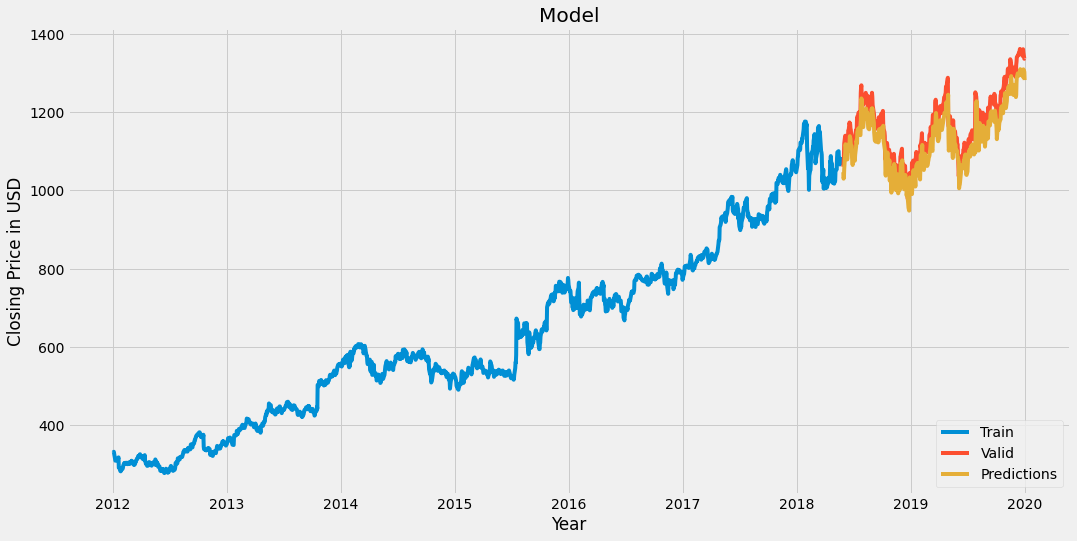

In [15]:
train = data[:training_data_length]
valid = data[training_data_length:]
valid['Predictions'] = predictions

plt.figure(figsize=(16,8))
plt.title("Model")
plt.xlabel("Year")
plt.ylabel('Closing Price in USD') 
plt.plot(train['Close'])
plt.plot(valid[['Close' , 'Predictions']])
plt.legend(['Train','Valid', 'Predictions'], loc='lower right')
st.altair_chart(plt.legend(['Train','Valid', 'Predictions'], loc='lower right'))

In [16]:
valid
st.write(valid)


,Close,Predictions
Date,,
2018-05-29,1060.319946,1046.466187
2018-05-30,1067.800049,1030.023315
2018-05-31,1084.989990,1034.576172
2018-06-01,1119.500000,1055.033936
2018-06-04,1139.290039,1093.706909
...,...,...
2019-12-24,1343.560059,1294.339722
2019-12-26,1360.400024,1289.610107
2019-12-27,1351.890015,1309.170776
